# This notebook is used for the development of the Program Builder for the DecaDAC

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import qupulse
from qupulse.pulses.plotting import plot
from qupulse.pulses import PointPT, TablePT, FunctionPT, SequencePT, RepetitionPT, AtomicMultiChannelPT, ParallelConstantChannelPT
from qupulse.serialization import Serializer, FilesystemBackend
from qupulse.hardware.setup import HardwareSetup, MeasurementMask
from qupulse.hardware.awgs.zihdawg import HDAWGTriggerOutSource

\\Janeway\User AG Bluhm\Surrey\git\qupulse\qupulse\utils\types.py:36: UserWarning: gmpy2 not found. Using fractions.Fraction as fallback. Install gmpy2 for better performance.time_from_float might produce slightly different results
  warnings.warn('gmpy2 not found. Using fractions.Fraction as fallback. Install gmpy2 for better performance.'


In [3]:
from qupulse_mfli.mfli import MFLIDAQ, postprocessing_average_within_windows

In [4]:
from qcodes.instrument_drivers.Harvard.Decadac import Decadac

In [5]:
Setup = HardwareSetup()

In [6]:
# connecting the DecaDAC
dac = Decadac('dac1', 'ASRL4::INSTR', min_val=-10, max_val=10, division=1, terminator='\n')

Connected to Harvard DecaDAC (hw ver: 0, serial: 0) in 0.49s


In [7]:
for c in dac.channels:
    c.volt(0)

In [8]:
# connecting the MFLI
mfli = MFLIDAQ.connect_to("dev7113")

prefix = ""
channels = {
    f"{prefix}R": ["demods/0/sample.R"],
    f"{prefix}T": ["demods/0/sample.Theta"],
    f"{prefix}X": ["demods/0/sample.X"],
    f"{prefix}Y": ["demods/0/sample.Y"],
    f"{prefix}A1": ["demods/0/sample.AuxIn0"],
    f"{prefix}A2": ["demods/0/sample.AuxIn1"],
    f"{prefix}F": ["demods/0/sample.Frequency"],
} 
# TODO it is possible, that the channels like to be called with *.avg at the end. At least that is what the LabOne web interface logs. But for R it worked without.

# now the channels are to be registered.
for k, v in channels.items():
    # at the lock-in side: (None refers to the default)
    mfli.register_measurement_channel(program_name=None, window_name=k, channel_path=v)
    # and at the qupulse side:
    Setup.set_measurement(f"{k}", MeasurementMask(mfli, k))

# then we set the trigger default settings
mfli.register_trigger_settings(program_name=None,
                                trigger_input=f"demods/0/sample.TrigIn1", # here TrigInN referrers to the printer label N
                                edge="rising",
                                trigger_count=1, # one trigger event per measurement
                                level=.5,
                                measurement_count=1, # one measurement per arm
                                other_settings={"holdoff/time": 1e-3}
                                )

In [9]:
import time

In [636]:
def send_trigger():
    mfli.api_session.set(f"/{mfli.serial}/auxouts/0/offset", 2)
    time.sleep(0.5)
    mfli.api_session.set(f"/{mfli.serial}/auxouts/0/offset", 0)

In [1050]:
from qupulse.hardware.awgs.decadac import *

In [651]:
download_script(script_length=500, serial_ask=dac.ask_raw)

 55%|█████▌    | 138/250 [00:06<00:05, 20.83it/s]

Could not decode 10000101
Could not decode 11000011
Could not decode 10010100
Could not decode 11001110


 58%|█████▊    | 144/250 [00:06<00:05, 20.83it/s]

Could not decode 10100011
Could not decode 10000011
Could not decode 10001000


 60%|██████    | 150/250 [00:07<00:04, 20.83it/s]

Could not decode 10001000
Could not decode 11001111
Could not decode 10011000
Could not decode 10101000


 62%|██████▏   | 156/250 [00:07<00:04, 20.84it/s]

Could not decode 10111010
Could not decode 10000011
Could not decode 10001000
Could not decode 10111111
Could not decode 10000111
Could not decode 10100000


 64%|██████▎   | 159/250 [00:07<00:04, 21.53it/s]

Could not decode 10010000
Could not decode 11000001
Could not decode 10100001
Could not decode 10110001
Could not decode 11110111
Could not decode 11011111


 66%|██████▌   | 165/250 [00:07<00:04, 21.18it/s]

Could not decode 11000110
Could not decode 11001101
Could not decode 11001101
Could not decode 11001111
Could not decode 10110011


 68%|██████▊   | 171/250 [00:08<00:03, 20.99it/s]

Could not decode 10111111
Could not decode 11011101
Could not decode 11110011
Could not decode 11101110
Could not decode 10111111
Could not decode 10101101
Could not decode 11110100


 70%|██████▉   | 174/250 [00:08<00:03, 20.95it/s]

Could not decode 10101110
Could not decode 11001010
Could not decode 10111011
Could not decode 11110111
Could not decode 11110101
Could not decode 10011011


 72%|███████▏  | 180/250 [00:08<00:03, 20.90it/s]

Could not decode 10111011
Could not decode 11111110
Could not decode 11110110
Could not decode 10011010
Could not decode 11111000
Could not decode 11111100


 74%|███████▍  | 186/250 [00:08<00:03, 20.83it/s]

Could not decode 11000000
Could not decode 11010011
Could not decode 11011101
Could not decode 11101110
Could not decode 11111011
Could not decode 10111101


 77%|███████▋  | 192/250 [00:09<00:02, 20.83it/s]

Could not decode 11010011
Could not decode 11110001
Could not decode 11110111
Could not decode 10110001
Could not decode 10111111
Could not decode 10111101


 80%|████████  | 201/250 [00:09<00:02, 20.84it/s]

Could not decode 11001101
Could not decode 11010000
Could not decode 11010011
Could not decode 10100100


 83%|████████▎ | 207/250 [00:09<00:02, 20.83it/s]

Could not decode 10010011
Could not decode 11111010
Could not decode 10101001
Could not decode 10010000


 85%|████████▌ | 213/250 [00:10<00:01, 20.81it/s]

Could not decode 10100011
Could not decode 10000001
Could not decode 10100100
Could not decode 11000100


 86%|████████▋ | 216/250 [00:10<00:01, 20.81it/s]

Could not decode 11101100
Could not decode 11000000
Could not decode 11000100
Could not decode 10010000


 90%|█████████ | 225/250 [00:10<00:01, 21.19it/s]

Could not decode 11001000
Could not decode 10111000
Could not decode 11101111


 91%|█████████ | 228/250 [00:10<00:01, 21.08it/s]

Could not decode 10010001
Could not decode 11110101
Could not decode 11110111
Could not decode 10010001


 94%|█████████▎| 234/250 [00:11<00:00, 21.42it/s]

Could not decode 10010010
Could not decode 11100110
Could not decode 11100110


 96%|█████████▌| 240/250 [00:11<00:00, 21.12it/s]

Could not decode 11100111
Could not decode 11111111
Could not decode 11111111
Could not decode 11101010
Could not decode 11001100
Could not decode 10100111
Could not decode 11101100
Could not decode 11110011


 98%|█████████▊| 246/250 [00:11<00:00, 20.98it/s]

Could not decode 11101011
Could not decode 10001111
Could not decode 11111011
Could not decode 11010100
Could not decode 11101110
Could not decode 11010011
Could not decode 11010111


100%|██████████| 250/250 [00:11<00:00, 20.92it/s]

Could not decode 11011010
Could not decode 11111000
Could not decode 11100001
Could not decode 11001111
Could not decode 11110101
Could not decode 11001011


'*1:B0;M2;B1;M2;A1545;P32439;A1538;P3;A1577;P33095;A1570;P3;A1609;P33259;A1602;P3;A45056;P200;*2:X2050;*3:A1545;+3;A1538;P3;A1577;+-3;A1570;P3;A1609;+7;A1602;P3;$10000;*4:X772;A45056;+-1;X1283;*5:A1545;P32767;A1538;P3;A1577;P32767;A1570;P3;A1609;P32767;A1602;P3;X0;;X0;0;"(\x072$RQd p(R!\x10e\x02O\x05gP\x01 \x12",B\x04(C0,wk=\x1aW -gW8`\x0e[{<I-G[2\rS\x1bm@\tpLS(j\x11y\x1cO\x1cBL$\x1ap\x04\tD[\x05t\x05 &e=4n$\x12\\&\x05\x08\x1et|9p\x02!v\t\x0fm\x19;;5\x01ZsM{_yO!\x7f7mk?1-<'

In [633]:
# A{0x006FC1};   (Where the trigger inputs live (after hacking stuff))
# A{1545+16*(c+1)};+{int(cv)};A{1538+16*(c+1)};P3;
# (B1;C0;D{volt_to_int(0.2)};      (set the gate that we want to change to 0)

def prepare_board(board):
    return f"B{board};M2;"

def set_voltage_code(channel, volt):
    return f"A{1545+16*(channel)};P{volt_to_int(volt)};A{1538+16*(channel)};P3;"

def inc_voltage_code(channel, delta):
    int_delta = int(volt_to_int(delta)-volt_to_int(0))
    return f"A{1545+16*(channel)};+{int_delta};A{1538+16*(channel)};P3;"

def set_timer(duration_in_s):
    return f"${round(duration_in_s*1e6)};"

def not_triggered_jump(target):
    """
    SpecialConditions:
    ;08 = Trig1 is zero
    ;09 = Trig1 is not zero
    ;0A = Trig2 is zero
    ;0B = Trig2 is not zero
    """
    return f"X{0x800+target};"

def timer_running_jump(target):
    return f"X{0x300+target};"


def value_larger_zero_jump(target):
    return f"X{0x500+target};"

def unconditional_jump(target):
    return f"X{0x000+target};"

"""

  B0;C0;D{volt_to_int(0.05)};      (set the gate that we want to change to 0)
  B0;C2;D{volt_to_int(0.1)};      (set the gate that we want to change to 0)
  B1;C0;D{volt_to_int(-0.1)};      (set the gate that we want to change to 0)

  
  B0;C0;M2;G0;T0;C1;M2;G0;T0;
  B1;C0;M2;G0;T0;
  
"""
ramp_script = f"""
{{
*1:
  
  B0;M2; (setting the gating)
  B1;M2; (for all used boards)

  A45056;P200;   (Initialize our counter to 2**16-1)
  
  {set_voltage_code(0, -0.1)}
  {set_voltage_code(2, 0.1)}
  {set_voltage_code(4, 0.15)}
*2:
  X{0x802};      (X0x802 Jump to *2 if value trigger is 0)
*3:              (main loop with label "2")
  B0;C0;
  A{1545+16*(2)};+-1;     (Add one to the course DAC value for channel 0)
  A{1538+16*(2)};P3;      (Overwrite to force an update (0: no updates, 1: update enabled, 2: force update, 3: force update and update enabled))
  B0;C1;
  A{1545+16*(0)};+1;      (Add one to the course DAC value for channel 1)
  A{1538+16*(0)};P3;      (Overwrite to force an update (0: no updates, 1: update enabled, 2: force update, 3: force update and update enabled))
  B1;C0;
  A{1545+16*(4)};+2;      (Add one to the course DAC value for channel 0)
  A{1538+16*(4)};P3;      (Overwrite to force an update (0: no updates, 1: update enabled, 2: force update, 3: force update and update enabled))

  $5000;
*4:
  X{0x304};
  A45056;+ -1;   (Decrease the counter)
  X{0x503};      (X0x502 Jump to *2 if value behind the pointer is not 0)
*5:
  B0;C0;D{volt_to_int(0)};
  B0;C1;D{volt_to_int(0)};
  B1;C0;D{volt_to_int(0)};
  X0;
}};
"""

ramp_script_2 = f"""{{
*1:
  {prepare_board(0)}
  {prepare_board(1)}
  {set_voltage_code(0, -0.1)}
  {set_voltage_code(2, 0.1)}
  {set_voltage_code(4, 0.15)}
  
  A45056;P200;   (Initialize our counter)

*2:
  {not_triggered_jump(2)}
*3:
  {inc_voltage_code(0, 0.001)}
  {inc_voltage_code(2, -0.001)}
  {inc_voltage_code(4, 0.002)}

  {set_timer(0.01)}
*4:
  {timer_running_jump(4)}

  A45056;+ -1;   (Decrease the counter)
  {value_larger_zero_jump(3)}

*5:
  {set_voltage_code(0, 0)}
  {set_voltage_code(2, 0)}
  {set_voltage_code(4, 0)}
  {unconditional_jump(0)}

}};"""

In [1000]:
upload_script(ramp_script_2, serial_ask=dac.ask_raw)

'{*1:B0;M2;B1;M2;A1545;P32439;A1538;P3;A1577;P33095;A1570;P3;A1609;P33259;A1602;P3;A45056;P200;*2:X2050;*3:A1545;+3;A1538;P3;A1577;+-3;A1570;P3;A1609;+7;A1602;P3;$10000;*4:X772;A45056;+-1;X1283;*5:A1545;P32767;A1538;P3;A1577;P32767;A1570;P3;A1609;P32767;A1602;P3;X0;}!'

In [447]:
dac.write_raw("X0;")

In [649]:
while dac.ask("") != "": pass

In [647]:
dac.write_raw("X1;")

In [648]:
send_trigger()

In [594]:
for c in dac.channels[:5]:
    c.volt(0.15)

In [17]:
def get(addr):
    res = download_16bit(addr, serial_ask=dac.ask_raw)
    print(f"{res} -> {bin(res)}")
    return res

In [1001]:
get(SCRIPT_START_ADDRESS+100)

20539 -> 0b101000000111011


20539

In [998]:
dac.ask(F"A{SCRIPT_START_ADDRESS+100};+-1;")

'A49508!+-1!'

In [650]:
raise NotImplementedError("This is not needed... X0x800 is designed for that...")
# inject_int(0x006FC4, 0b01001, serial_ask=dac.ask_raw) # 
inject_int(0x006F8A, 0b1111111111111001, serial_ask=dac.ask_raw) # setting the annoying registers to be output registers (0b1011101110000 & 0b1001) where the first binary number is the default
inject_int(0x006FC4, 0b1111111111111001, serial_ask=dac.ask_raw) # setting the annoying registers to 0
get(0x006FC0)

NotImplementedError: This is not needed... X0x800 is designed for that...

In [656]:
# playing around with LZ77

In [657]:
from qupulse.utils.performance import *

In [970]:
# compiling the compressed commands into the LinSpace commands

from qupulse.program.linspace import LoopLabel, Increment, Set, Wait, LoopJmp, Play

In [796]:
test_array = np.arange(100).reshape((50, 2))

In [1029]:
def test_compression_and_reconstruction(array, intermed, diffs, meta):
    compressed = compress_array_LZ77(array=array, allow_intermediates=intermed, using_diffs=diffs, allow_reconstructions_using_reconstructions=meta)
    uncompressed = uncompress_array_LZ77(compressed)
    if diffs:
        assert len(array) == len(uncompressed), f"{compressed=}, \n{uncompressed=}"
        assert np.allclose(array, np.cumsum(uncompressed, axis=0)), f"{compressed=}, \n{uncompressed=}"
    else:
        assert len(array) == len(uncompressed), f"{compressed=}, \n{uncompressed=}"
        assert np.allclose(array, uncompressed), f"{compressed=}, \n{uncompressed=}"
    return compressed, uncompressed

In [1030]:
def test_compression_and_reconstruction_helper(array):
    _ = test_compression_and_reconstruction(array, intermed=True, diffs=True, meta=True)
    _ = test_compression_and_reconstruction(array, intermed=True, diffs=False, meta=True)
    _ = test_compression_and_reconstruction(array, intermed=False, diffs=True, meta=True)
    _ = test_compression_and_reconstruction(array, intermed=False, diffs=False, meta=True)
    _ = test_compression_and_reconstruction(array, intermed=True, diffs=True, meta=False)
    _ = test_compression_and_reconstruction(array, intermed=True, diffs=False, meta=False)
    _ = test_compression_and_reconstruction(array, intermed=False, diffs=True, meta=False)
    _ = test_compression_and_reconstruction(array, intermed=False, diffs=False, meta=False)

In [1031]:
test_compression_and_reconstruction_helper(test_array)

In [1032]:
test_compression_and_reconstruction_helper(np.array([[1, 2, 3, 4, 5]]).T)
test_compression_and_reconstruction_helper(np.array([[1]]))
test_compression_and_reconstruction_helper(np.ones((100, 2)))
test_compression_and_reconstruction_helper(np.ones((1, 2)))
test_compression_and_reconstruction_helper(np.ones((1, 10)))
for _ in range(10):
    test_compression_and_reconstruction_helper(np.random.uniform(0, 1, (np.random.randint(1, 10), np.random.randint(1, 10))))


In [900]:
special_array = np.repeat(np.linspace(0, 100, 200)[:, None], 3, axis=1)
special_array[:, 0] = special_array[:, 0]%5*0.1
special_array[:, 1] = special_array[:, 1]%10*3

In [901]:
special_array = special_array.astype(int)

In [902]:
test_compression_and_reconstruction_helper(special_array.astype(int))
comp, _ = test_compression_and_reconstruction(special_array.astype(int), intermed=False, diffs=True)
comp

[(0, 0, array([0, 0, 0])),
 (0, 0, array([0, 1, 0])),
 (0, 0, array([0, 2, 1])),
 (2, 17, array([  0, -28,   1])),
 (20, 46, array([0, 2, 0])),
 (0, 0, array([0, 1, 1])),
 (2, 11, array([  0, -29,   1])),
 (0, 0, array([0, 2, 0])),
 (0, 0, array([0, 1, 1])),
 (2, 17, array([  0, -29,   1])),
 (20, 33, array([0, 2, 1])),
 (0, 0, array([0, 1, 0])),
 (2, 4, array([  0, -28,   1])),
 (0, 0, array([0, 1, 0])),
 (0, 0, array([0, 2, 1])),
 (2, 17, array([  0, -28,   1])),
 (20, 38, array([  0, -28,   1]))]

In [906]:
csd_2d = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 7), indexing='ij')
csd_2d_with_sensor = np.ones((3, 10, 7))
csd_2d_with_sensor[0] = csd_2d[0]*0.1+0.51
csd_2d_with_sensor[1] = csd_2d[1]*0.5+0.322
csd_2d_with_sensor[2] = -1*csd_2d_with_sensor[0]*0.1+-1*csd_2d_with_sensor[1]*0.14
csd_2d_with_sensor.shape

(3, 10, 7)

In [908]:
csd_pulse = csd_2d_with_sensor.reshape((3, -1)).T*100

In [910]:
csd_pulse.astype(int)

array([[ 51,  32,  -9],
       [ 51,  40, -10],
       [ 51,  48, -11],
       [ 51,  57, -13],
       [ 51,  65, -14],
       [ 51,  73, -15],
       [ 51,  82, -16],
       [ 52,  32,  -9],
       [ 52,  40, -10],
       [ 52,  48, -12],
       [ 52,  57, -13],
       [ 52,  65, -14],
       [ 52,  73, -15],
       [ 52,  82, -16],
       [ 53,  32,  -9],
       [ 53,  40, -10],
       [ 53,  48, -12],
       [ 53,  57, -13],
       [ 53,  65, -14],
       [ 53,  73, -15],
       [ 53,  82, -16],
       [ 54,  32,  -9],
       [ 54,  40, -11],
       [ 54,  48, -12],
       [ 54,  57, -13],
       [ 54,  65, -14],
       [ 54,  73, -15],
       [ 54,  82, -16],
       [ 55,  32, -10],
       [ 55,  40, -11],
       [ 55,  48, -12],
       [ 55,  57, -13],
       [ 55,  65, -14],
       [ 55,  73, -15],
       [ 55,  82, -17],
       [ 56,  32, -10],
       [ 56,  40, -11],
       [ 56,  48, -12],
       [ 56,  57, -13],
       [ 56,  65, -14],
       [ 56,  73, -15],
       [ 56,  82

In [909]:
test_compression_and_reconstruction_helper(csd_pulse.astype(int))
comp, _ = test_compression_and_reconstruction(csd_pulse.astype(int), intermed=False, diffs=True)
comp

[(0, 0, array([51, 32, -9])),
 (0, 0, array([ 0,  8, -1])),
 (1, 1, array([ 0,  9, -2])),
 (0, 0, array([ 0,  8, -1])),
 (1, 1, array([ 0,  9, -1])),
 (0, 0, array([  1, -50,   7])),
 (0, 0, array([ 0,  8, -1])),
 (0, 0, array([ 0,  8, -2])),
 (0, 0, array([ 0,  9, -1])),
 (7, 11, array([ 0,  8, -2])),
 (0, 0, array([ 0,  8, -1])),
 (0, 0, array([ 0,  9, -1])),
 (0, 0, array([ 0,  8, -1])),
 (1, 1, array([ 0,  9, -1])),
 (0, 0, array([  1, -50,   6])),
 (0, 0, array([ 0,  8, -1])),
 (1, 1, array([ 0,  9, -1])),
 (0, 0, array([ 0,  8, -1])),
 (1, 1, array([ 0,  9, -2])),
 (0, 0, array([  1, -50,   7])),
 (7, 11, array([ 0,  8, -2])),
 (0, 0, array([ 0,  9, -1])),
 (0, 0, array([  1, -50,   7])),
 (0, 0, array([ 0,  8, -1])),
 (1, 1, array([ 0,  9, -1])),
 (0, 0, array([ 0,  8, -2])),
 (0, 0, array([ 0,  8, -1])),
 (7, 8, array([  2, -50,   7])),
 (0, 0, array([ 0,  8, -1])),
 (1, 1, array([ 0,  9, -2])),
 (0, 0, array([ 0,  8, -1])),
 (1, 1, array([ 0,  9, -1]))]

In [1218]:
vg_csd_2d = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10), indexing='ij')
vg_csd_2d_with_sensor = np.ones((2, np.prod(vg_csd_2d[0].shape)))
vg_csd_2d_with_sensor[0] = (vg_csd_2d[0].flatten()*0.1+0.51)*+0.9 #+ (vg_csd_2d[1].flatten()*0.5+0.322)*-0.1
vg_csd_2d_with_sensor[1] = (vg_csd_2d[1].flatten()*0.1+0.51)*-0.2 #+ (vg_csd_2d[1].flatten()*0.5+0.322)*+0.8
vg_csd_pulse = vg_csd_2d_with_sensor.T*10
# print(vg_csd_pulse)
# test_compression_and_reconstruction_helper(vg_csd_pulse.astype(int))
comp, _ = test_compression_and_reconstruction(volt_to_int(vg_csd_pulse), intermed=False, diffs=True, meta=False)
len(comp), comp

(13,
 [(0, 0, array([47807., 29425.])),
  (0, 0, array([  0., -73.])),
  (1, 3, array([  0., -72.])),
  (0, 0, array([  0., -73.])),
  (1, 3, array([328., 656.])),
  (10, 10, array([  0., -73.])),
  (1, 3, array([  0., -72.])),
  (0, 0, array([  0., -73.])),
  (1, 3, array([327., 656.])),
  (30, 60, array([  0., -73.])),
  (1, 3, array([  0., -72.])),
  (0, 0, array([  0., -73.])),
  (1, 3, None)])

In [1260]:
compressed_array = comp
dt = 1e-3

def LZ77_to_Linspace_Commands(lz77_compressed, dt=1e-3):

    print_intermediate_programs = False
    print_index_calculations = False

    loop_indecies = range(int(10_000_000_000_000)).__iter__()

    commands = []
    unrolled_step_index = []
    for s, (o, d, v) in enumerate(compressed_array):
        if print_intermediate_programs or print_index_calculations: print(); 
        if print_intermediate_programs: print((o, d, v))
        commands.append([])
        unrolled_step_index.append((unrolled_step_index[-1]+1 if len(unrolled_step_index)>0 else 0))
        if v is not None:
            for i, a in enumerate(v):
                if a != 0:
                    commands[-1].append(Increment(i, a, None))
            commands[-1].append(Wait(dt))
        if d != 0:
            lx = next(loop_indecies)
            r = d//o
            assert r > 0
            if print_index_calculations: 
                print(o, len(commands))
                print((o, d, v))
                print(s, (o, d), r, unrolled_step_index, unrolled_step_index[-1]-o)
            eff = np.where(np.array(unrolled_step_index) == unrolled_step_index[-1]-o)[0][-1]
            if print_index_calculations: print(eff)
            commands[eff].insert(0, LoopLabel(lx, r))
            commands[-2].append(LoopJmp(lx))
            foo = unrolled_step_index[-1]
            for _o in range(len(unrolled_step_index)):
                if len(unrolled_step_index)-_o-1-1 < eff: break
                if print_index_calculations: print(_o, r, _o)
                unrolled_step_index[-_o-1] += d
                if print_index_calculations: print(unrolled_step_index)
        if print_index_calculations: print(unrolled_step_index)
        if print_intermediate_programs: print("\n".join([str(c) for c in commands]))

    if print_intermediate_programs or print_index_calculations: print(commands)

    # flattening the commands
    commands = [c for cc in commands for c in cc]
    return commands



In [1261]:
LZ77_to_Linspace_Commands(compressed_array, dt)

[Increment(channel=0, value=47807.0, dependency_key=None),
 Increment(channel=1, value=29425.0, dependency_key=None),
 Wait(duration=0.001),
 LoopLabel(idx=5, count=2),
 LoopLabel(idx=2, count=1),
 LoopLabel(idx=0, count=3),
 Increment(channel=1, value=-73.0, dependency_key=None),
 Wait(duration=0.001),
 LoopJmp(idx=0),
 Increment(channel=1, value=-72.0, dependency_key=None),
 Wait(duration=0.001),
 LoopLabel(idx=1, count=3),
 Increment(channel=1, value=-73.0, dependency_key=None),
 Wait(duration=0.001),
 LoopJmp(idx=1),
 Increment(channel=0, value=328.0, dependency_key=None),
 Increment(channel=1, value=656.0, dependency_key=None),
 Wait(duration=0.001),
 LoopJmp(idx=2),
 LoopLabel(idx=3, count=3),
 Increment(channel=1, value=-73.0, dependency_key=None),
 Wait(duration=0.001),
 LoopJmp(idx=3),
 Increment(channel=1, value=-72.0, dependency_key=None),
 Wait(duration=0.001),
 LoopLabel(idx=4, count=3),
 Increment(channel=1, value=-73.0, dependency_key=None),
 Wait(duration=0.001),
 LoopJ

In [1220]:
%debug

> c:\users\surrey\appdata\local\temp\ipykernel_18056\2228648148.py(31)<module>()

[7, 8, 9, 10, 11, 12]


In [ ]:
# translating the Commands to DecaDAC commands
loops = {}
last_used_loop_addrs = 1
last_used_memory_addrs = 45056

def get_initialization(boards:Union[List[int], None]=None):
    res = ["*1:"]
    if boards is None:
        boards = [1, 2, 3, 4, 5]
    for b in boards:
        res.append(f"B{b};M2;")
        
    """
    SpecialConditions:
    ;08 = Trig1 is zero
    ;09 = Trig1 is not zero
    ;0A = Trig2 is zero
    ;0B = Trig2 is not zero
    """
    res.append(f"X{0x800+1};")

    return "".join(res)

def LoopLabel_to_DecaDAC(val:LoopLabel):
    nonlocal last_used_loop_addrs, last_used_memory_addrs, loops

    assert val.idx not in loops
    last_used_loop_addrs += 1
    last_used_memory_addrs += 1
    loops[val.idx] = {"count": val.count, "loop_addr": last_used_loop_addrs, "counter_addr": last_used_memory_addrs}

    return f"A{loops[val.idx]['counter_addr']};P{loops[val.idx]['count']};*{loops[val.idx]['loop_addr']}:"

def LoopJmp_to_DecaDAC(val:LoopJmp):
    assert val.idx in loops
    return f"A{loops[val.idx]['counter_addr']};+-1;X{0x500+loops[val.idx]['loop_addr']};"

def Increment_to_DecaDAC(val:Increment):
    int_delta = int(volt_to_int(val.value)-volt_to_int(0))
    return f"A{1545+16*(val.channel)};+{int_delta};A{1538+16*(val.channel)};P3;"

def Set_to_DecaDAC(val:Set):
    value_to_set = volt_to_int(val.value)
    return f"A{1545+16*(val.channel)};+{value_to_set};A{1538+16*(val.channel)};P3;"

def Wait_to_DecaDAC(val:Wait):
    nonlocal last_used_loop_addrs
    d_in_us = int(round(float(val.duration)*1e-3)) # from ns to us
    last_used_loop_addrs += 1
    return f"${d_in_us};*{last_used_loop_addrs};X{0x300+last_used_loop_addrs};"

def Play_to_DecaDAC(val:Play):
    raise NotImplementedError()


In [1057]:
from qupulse.pulses import *
from qupulse.program.linspace import *
from qupulse.program.transformation import *

In [1147]:
my_program = LinSpaceIter(length=100, body=(LinSpaceIter(
            length=200,
            body=(LinSpaceHold(
                bases=(-.1, -0.5),
                factors=((0.0, 0.001),
                         (0.002, 0.0)),
                duration_base=TimeType(10**6),
                duration_factors=None
            ),)
        ),))

In [1148]:
commands = to_increment_commands(my_program)
commands

[Set(channel=0, value=-0.1, key=DepKey(factors=(0, 1000000))),
 Set(channel=1, value=-0.5, key=DepKey(factors=(2000000,))),
 Wait(duration=TimeType(1000000, 1)),
 LoopLabel(idx=0, count=199),
 Increment(channel=0, value=0.001, dependency_key=DepKey(factors=(0, 1000000))),
 Wait(duration=TimeType(1000000, 1)),
 LoopJmp(idx=0),
 LoopLabel(idx=1, count=99),
 Increment(channel=0, value=-0.2, dependency_key=DepKey(factors=(0, 1000000))),
 Increment(channel=1, value=0.002, dependency_key=DepKey(factors=(2000000,))),
 Wait(duration=TimeType(1000000, 1)),
 LoopLabel(idx=2, count=199),
 Increment(channel=0, value=0.001, dependency_key=DepKey(factors=(0, 1000000))),
 Wait(duration=TimeType(1000000, 1)),
 LoopJmp(idx=2),
 LoopJmp(idx=1)]

In [1171]:
commands = [
    Set(channel=0, value=-0.1, key=DepKey(factors=(0, 1000000))),
    Set(channel=1, value=-0.5, key=DepKey(factors=(2000000,))),
    Wait(duration=TimeType(1000000000, 1)),
    LoopLabel(idx=0, count=10),
    Increment(channel=0, value=0.001, dependency_key=DepKey(factors=(0, 1000000))),
    Wait(duration=TimeType(1000000000, 1)),
    LoopJmp(idx=0),
    LoopLabel(idx=1, count=10),
    Set(channel=0, value=-0.1, key=DepKey(factors=(0, 1000000))),
    Increment(channel=1, value=0.002, dependency_key=DepKey(factors=(2000000,))),
    Wait(duration=TimeType(1000000000, 1)),
    LoopLabel(idx=2, count=10),
    Increment(channel=0, value=0.001, dependency_key=DepKey(factors=(0, 1000000))),
    Wait(duration=TimeType(1000000000, 1)),
    LoopJmp(idx=2),
    LoopJmp(idx=1),
    Set(channel=0, value=-0.1, key=DepKey(factors=(0, 1000000))),
    Set(channel=1, value=-0.5, key=DepKey(factors=(2000000,))),
 ]

In [1172]:
translated = translate_command_list_to_ascii(commands, channel_mapping={0:0, 1:2})
translated

'*1:B0;M2;B1;M2;B2;M2;B3;M2;B4;M2;*2:X2050;A1545;P32439;A1538;P3;A1577;P31129;A1570;P3;$1000000;*3:X771;A45057;P10;*4:A1545;+3;A1538;P3;$1000000;*5:X773;A45057;+-1;X1284;A45058;P10;*6:A1545;P32439;A1538;P3;A1577;+7;A1570;P3;$1000000;*7:X775;A45059;P10;*8:A1545;+3;A1538;P3;$1000000;*9:X777;A45059;+-1;X1288;A45058;+-1;X1286;A1545;P32439;A1538;P3;A1577;P31129;A1570;P3;X0;'

In [1088]:
dac.visa_handle.__dir__()

['_resource_manager',
 'visalib',
 '_resource_name',
 '_logging_extra',
 '_session',
 '_write_termination',
 '_read_termination',
 '__module__',
 '__annotations__',
 '__doc__',
 'baud_rate',
 'data_bits',
 'parity',
 'stop_bits',
 'flow_control',
 'bytes_in_buffer',
 'discard_null',
 'allow_transmit',
 'end_input',
 'end_output',
 'break_length',
 'break_state',
 'replace_char',
 'xoff_char',
 'xon_char',
 'visa_attributes_classes',
 'CR',
 'LF',
 'chunk_size',
 'query_delay',
 '_encoding',
 'encoding',
 'read_termination',
 'write_termination',
 'send_end',
 'io_protocol',
 'allow_dma',
 'write_raw',
 'write',
 'write_ascii_values',
 'write_binary_values',
 'read_bytes',
 'read_raw',
 '_read_raw',
 'read',
 'read_ascii_values',
 'read_binary_values',
 'query',
 'query_ascii_values',
 'query_binary_values',
 'assert_trigger',
 'stb',
 'read_stb',
 'read_termination_context',
 'flush',
 'register',
 '__init__',
 'session',
 '__del__',
 '__str__',
 '__repr__',
 '__enter__',
 '__exit__',


In [1062]:
DecaDACRep = DecaDACRepresentation(serial_ask=dac.ask_raw)

In [1173]:
DecaDACRep.upload_command_list(commands, channel_mapping={0:0, 1:2})

In [1174]:
DecaDACRep.reset()

In [1175]:
DecaDACRep.arm()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Surrey\Miniconda3\envs\ml4qworkshop\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Surrey\AppData\Local\Temp\ipykernel_18056\2301541558.py", line 1, in <module>
    DecaDACRep.arm()
  File "\\Janeway\User AG Bluhm\Surrey\git\qupulse\qupulse\hardware\awgs\decadac.py", line 202, in arm
    run_script(serial_ask=self.serial_ask, label=1)
  File "\\Janeway\User AG Bluhm\Surrey\git\qupulse\qupulse\hardware\awgs\decadac.py", line 120, in run_script
    resp = serial_ask(f"X{label};")
  File "\\Janeway\User AG Bluhm\Surrey\git\Qcodes\qcodes\instrument\visa.py", line 235, in ask_raw
    response = self.visa_handle.query(cmd)
  File "c:\Users\Surrey\Miniconda3\envs\ml4qworkshop\lib\site-packages\pyvisa\resources\messagebased.py", line 644, in query
    return self.read()
  File "c:\Users\Surrey\Miniconda3\envs\ml4qworkshop\lib\site-packages\pyvi

In [1424]:
import matplotlib.pyplot as plt

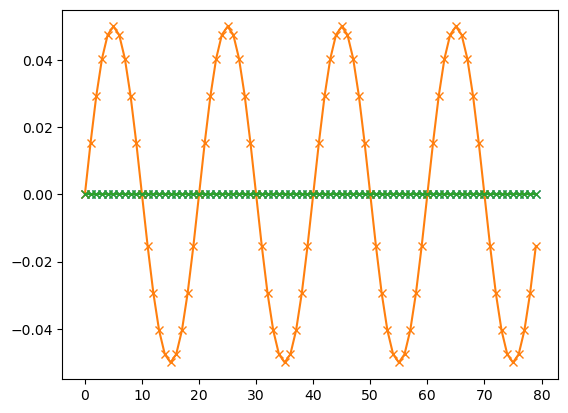

In [1453]:
simple_numpy_pulse = np.repeat(np.cumsum(np.ones(80))[None, :], 3, axis=0)/150
simple_numpy_pulse[1, :] = np.repeat((np.sin(2*np.pi*np.arange(20)/20)*0.05)[None, :], 4, axis=0).flatten()
simple_numpy_pulse[2, :] *= -0.5


simple_numpy_pulse[0, :] *= 0.0
simple_numpy_pulse[2, :] *= 0.0

plt.plot(simple_numpy_pulse.T, marker="x")
plt.show()

(80, 3)


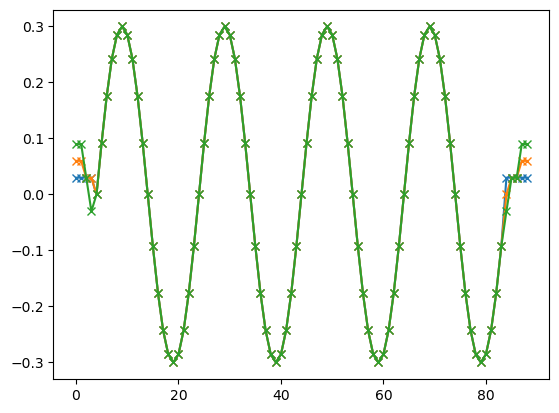

In [1535]:
periods = 4

sin_segment = (np.repeat(np.sin(2*np.pi*np.arange(20)/20)[None, :], 3, axis=0).T)
sin_segment = np.repeat(sin_segment[None, :, :], periods, axis=0).reshape((-1, 3))

print(sin_segment.shape)

simple_numpy_pulse = np.concatenate([
    np.array([[0.1, 0.2, 0.3]]),
    np.array([[0.1, 0.2, 0.3]]),
    np.array([[0.1, 0.1, 0.1]]),
    np.array([[0.1, 0.1, -0.1]]),
    sin_segment,
    np.array([[0.1, 0.0, -0.1]]),
    np.array([[0.1, 0.1, 0.1]]),
    np.array([[0.1, 0.1, 0.1]]),
    np.array([[0.1, 0.2, 0.3]]),
    np.array([[0.1, 0.2, 0.3]]),
])
simple_numpy_pulse = simple_numpy_pulse.T*0.3

plt.plot(simple_numpy_pulse.T, marker="x")
plt.show()

In [1531]:
comp = compress_array_LZ77(array=volt_to_int(simple_numpy_pulse.T).astype(int), allow_intermediates=False, using_diffs=True, allow_reconstructions_using_reconstructions=False)
print(len(comp))
comp

47


[(0, 0, array([32865, 32964, 33062])),
 (0, 0, array([0, 0, 0])),
 (0, 0, array([   0,  -99, -197])),
 (0, 0, array([   0,    0, -196])),
 (0, 0, array([-98, -98,  98])),
 (0, 0, array([304, 304, 304])),
 (0, 0, array([274, 274, 274])),
 (0, 0, array([217, 217, 217])),
 (0, 0, array([140, 140, 140])),
 (0, 0, array([48, 48, 48])),
 (0, 0, array([-48, -48, -48])),
 (0, 0, array([-140, -140, -140])),
 (0, 0, array([-217, -217, -217])),
 (0, 0, array([-274, -274, -274])),
 (0, 0, array([-304, -304, -304])),
 (1, 1, array([-274, -274, -274])),
 (0, 0, array([-217, -217, -217])),
 (0, 0, array([-140, -140, -140])),
 (0, 0, array([-48, -48, -48])),
 (0, 0, array([48, 48, 48])),
 (0, 0, array([140, 140, 140])),
 (0, 0, array([217, 217, 217])),
 (0, 0, array([274, 274, 274])),
 (0, 0, array([304, 304, 304])),
 (20, 1960, array([304, 304, 304])),
 (0, 0, array([274, 274, 274])),
 (0, 0, array([217, 217, 217])),
 (0, 0, array([140, 140, 140])),
 (0, 0, array([48, 48, 48])),
 (0, 0, array([-48, -

In [1536]:
DecaDACRep.upload_numpy_pulse(numpy_pulse=simple_numpy_pulse.T, dt=1e+7, channel_mapping={0:0, 1:2, 2:4})

*1:B0;M2;B1;M2;B2;M2;B3;M2;B4;M2;*2:X2050;A1545;P32865;A1538;P3;A1577;P32964;A1570;P3;A1609;P33062;A1602;P3;$10000;*3:X771;$10000;*4:X772;A1577;+-99;A1570;P3;A1609;+-197;A1602;P3;$10000;*5:X773;A1609;+-196;A1602;P3;$10000;*6:X774;A1545;+-98;A1538;P3;A1577;+-98;A1570;P3;A1609;+98;A1602;P3;$10000;*7:X775;A45057;P2;*8:A1545;+304;A1538;P3;A1577;+304;A1570;P3;A1609;+304;A1602;P3;$10000;*9:X777;A1545;+274;A1538;P3;A1577;+274;A1570;P3;A1609;+274;A1602;P3;$10000;*10:X778;A1545;+217;A1538;P3;A1577;+217;A1570;P3;A1609;+217;A1602;P3;$10000;*11:X779;A1545;+140;A1538;P3;A1577;+140;A1570;P3;A1609;+140;A1602;P3;$10000;*12:X780;A1545;+48;A1538;P3;A1577;+48;A1570;P3;A1609;+48;A1602;P3;$10000;*13:X781;A1545;+-48;A1538;P3;A1577;+-48;A1570;P3;A1609;+-48;A1602;P3;$10000;*14:X782;A1545;+-140;A1538;P3;A1577;+-140;A1570;P3;A1609;+-140;A1602;P3;$10000;*15:X783;A1545;+-217;A1538;P3;A1577;+-217;A1570;P3;A1609;+-217;A1602;P3;$10000;*16:X784;A1545;+-274;A1538;P3;A1577;+-274;A1570;P3;A1609;+-274;A1602;P3;$10000;*17

In [1280]:
volt_to_int(0)

32767.0

In [1534]:
DecaDACRep.reset()

In [1538]:
for _ in range(10):
    DecaDACRep.arm()
    time.sleep(20)

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.